# Heart Disease Predictor Project
### By: Salvatore Palmeri

In [1]:
#Import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load dataset
df = pd.read_csv('C:/Users/salpa/OneDrive/CSC Stuff/GitHub/heart-disease-predictor/data/heart.csv')

In [3]:
#Print dataset
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## Box Plots
#### Check for outliers

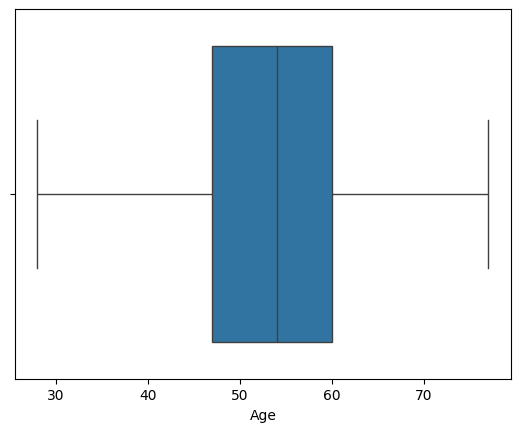

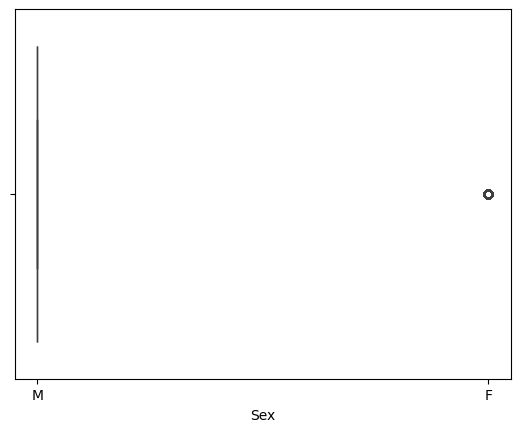

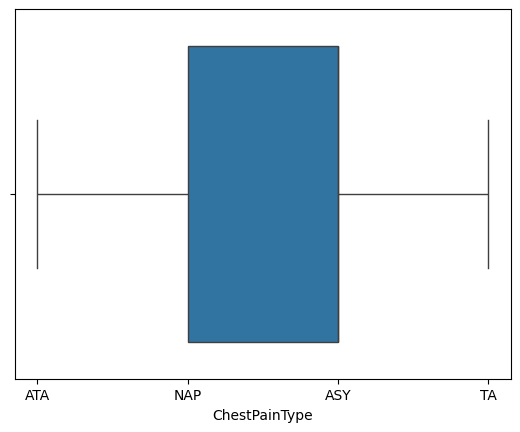

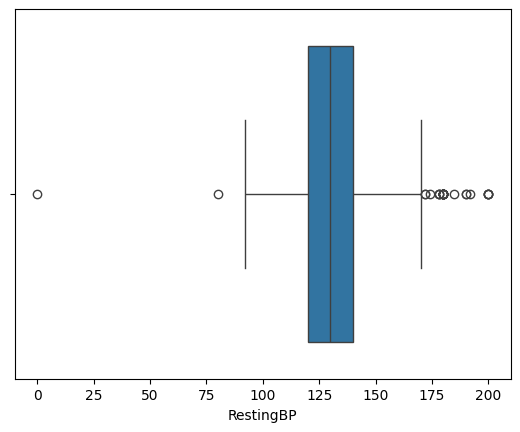

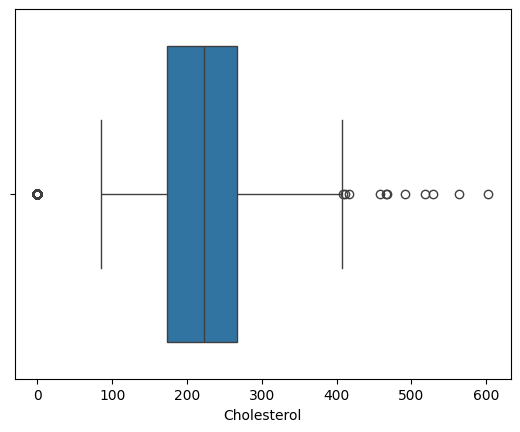

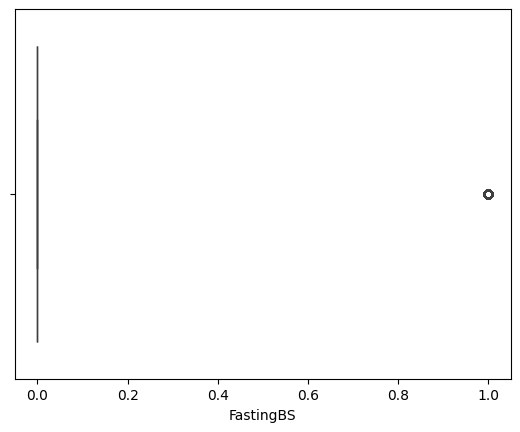

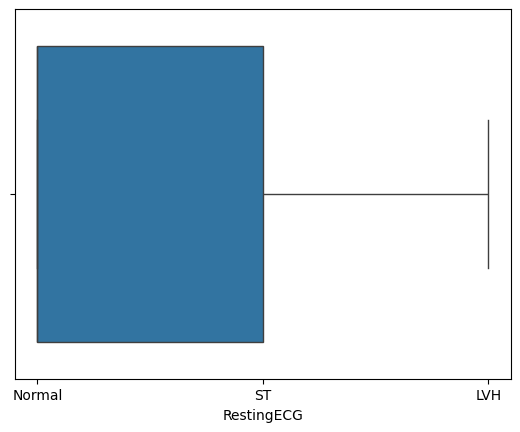

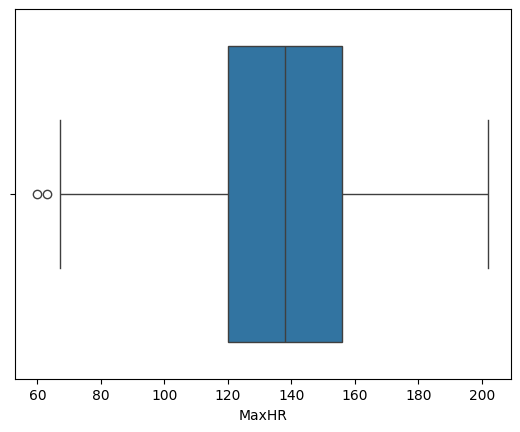

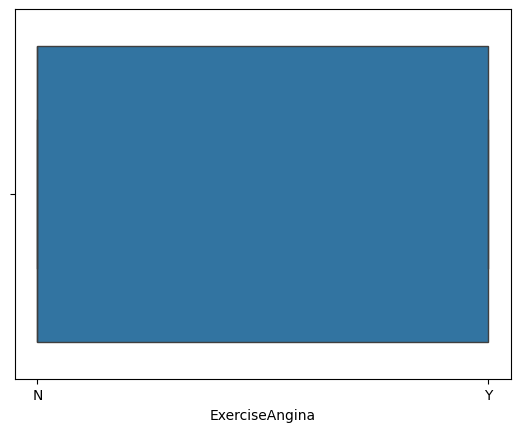

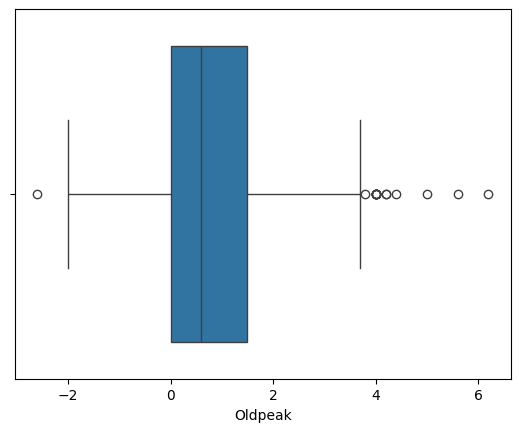

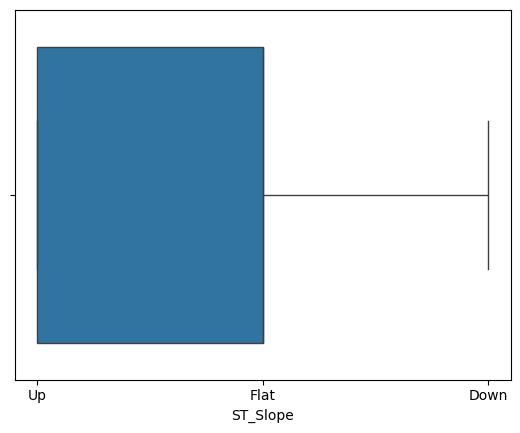

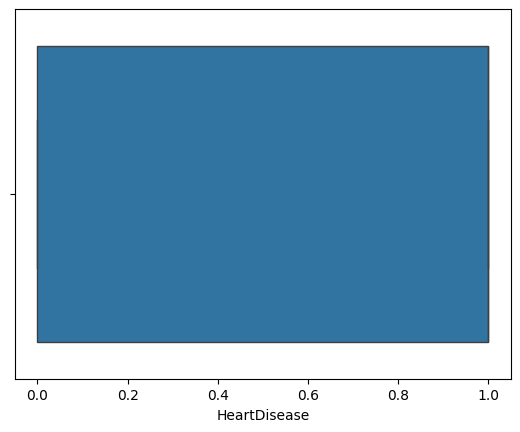

In [6]:
for i in df:
    sns.boxplot(x=i, data = df)
    plt.show()

# Data Preprocessing

In [7]:
#Check for missing values
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
#Encode the categorical columns
df['Sex'] = pd.factorize(df['Sex'])[0]
df['ExerciseAngina'] = pd.factorize(df['ExerciseAngina'])[0]
#One hot encoding for other columns
df = pd.get_dummies(df, columns=['ChestPainType', 'RestingECG', 'ST_Slope'])
df = df.astype(int)

In [9]:
#Newly encoded dataset
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,0,140,289,0,172,0,0,0,0,1,0,0,0,1,0,0,0,1
1,49,1,160,180,0,156,0,1,1,0,0,1,0,0,1,0,0,1,0
2,37,0,130,283,0,98,0,0,0,0,1,0,0,0,0,1,0,0,1
3,48,1,138,214,0,108,1,1,1,1,0,0,0,0,1,0,0,1,0
4,54,0,150,195,0,122,0,0,0,0,0,1,0,0,1,0,0,0,1


In [10]:
#Handle the outliers from the columns
selected_columns = ['MaxHR', 'Oldpeak', 'Cholesterol', 'RestingBP']
Q1 = df[selected_columns].quantile(0.25)
Q3 = df[selected_columns].quantile(0.75)
IQR = Q3 - Q1
IQR

MaxHR          36.00
Oldpeak         1.00
Cholesterol    93.75
RestingBP      20.00
dtype: float64

In [11]:
#New truncated dataset
df_truncated = df[~((df[selected_columns] < (Q1 - 1.5 * IQR)) | (df[selected_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Train/Test Split

In [12]:
#Setting the target variable
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X = df_truncated.drop('HeartDisease', axis=1)
y = df_truncated['HeartDisease']

In [13]:
#Split data into training and testing sets 
def split_and_scale_data(X, y, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size = test_size,
                                                        random_state=random_state)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled, y_train, y_test
X_train, X_test, y_train, y_test = split_and_scale_data(X, y)

# Model Implementation and Evaluation

In [14]:
import time as tm
from sklearn.metrics import (confusion_matrix, accuracy_score, recall_score, precision_score, f1_score)

## Logistic Regression

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

#Hyperparameter tuning
log_params = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2'],
    'max_iter': [500, 1000]
}

log_grid = GridSearchCV(LogisticRegression(), log_params, cv=5, scoring='accuracy')

start_time = tm.time()
log_grid.fit(X_train, y_train)
end_time = tm.time()
elapsed_time = end_time - start_time

print("Logistic Regression fitting time(in Seconds): {:.4f}".format(elapsed_time))
print("Best Logistic Regression Params:", log_grid.best_params_)

best_log_model = log_grid.best_estimator_
y_pred = best_log_model.predict(X_test)

Logistic Regression fitting time(in Seconds): 0.1662
Best Logistic Regression Params: {'C': 0.01, 'max_iter': 500, 'penalty': 'l2', 'solver': 'liblinear'}


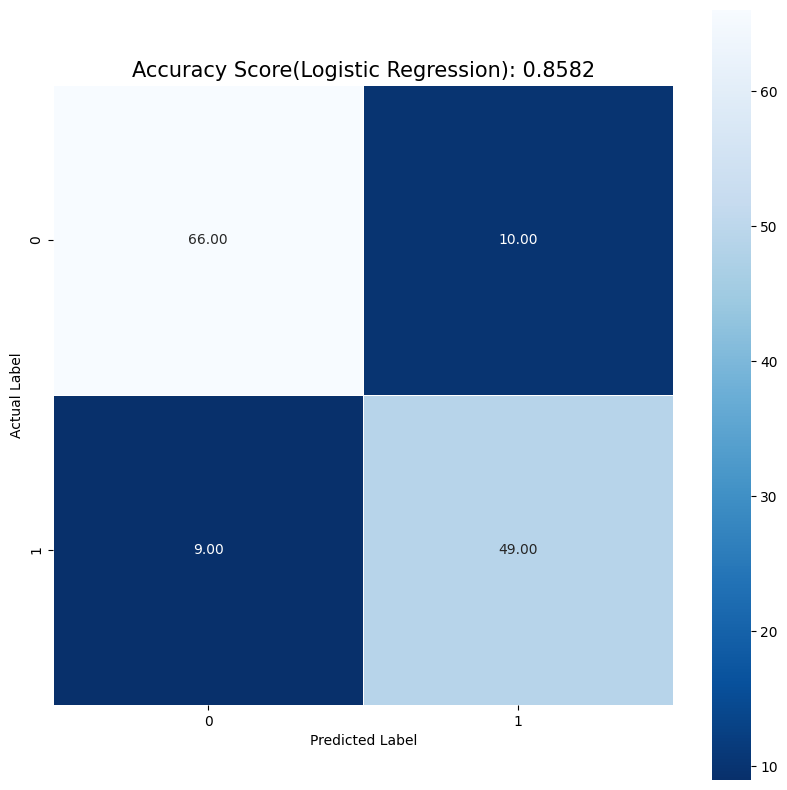

In [16]:
score1 = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".2f",
            linewidths=.5,
            square=True,
            cmap='Blues_r');
plt.ylabel('Actual Label');
plt.xlabel('Predicted Label');
all_sample_title = 'Accuracy Score(Logistic Regression): {:.4f}'.format(score1)
plt.title(all_sample_title, size = 15);

In [17]:
#Output the metrics for logistic regression
precision_1 = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall_1 = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1_1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print(precision_1)
print(recall_1)
print(f1_1)

0.8585782949658487
0.8582089552238806
0.8583453930888941


##### Logistic Regression demonstrates balanced performance with the metrics all around 0.86, indicating consistent prediction ability. 

## Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier

#Hyperparameter tuning
tree_params = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

tree_grid = GridSearchCV(DecisionTreeClassifier(), tree_params, cv=5, scoring='accuracy')

start_time = tm.time()
tree_grid.fit(X_train, y_train);
end_time = tm.time()
elapsed_time = end_time - start_time

print("Decision Tree fitting time(in Seconds): {:.4f}".format(elapsed_time))
print("Best Decision Tree Params:", tree_grid.best_params_)

best_tree_model = tree_grid.best_estimator_
y_pred_decision_tree = best_tree_model.predict(X_test)

Decision Tree fitting time(in Seconds): 0.7187
Best Decision Tree Params: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}


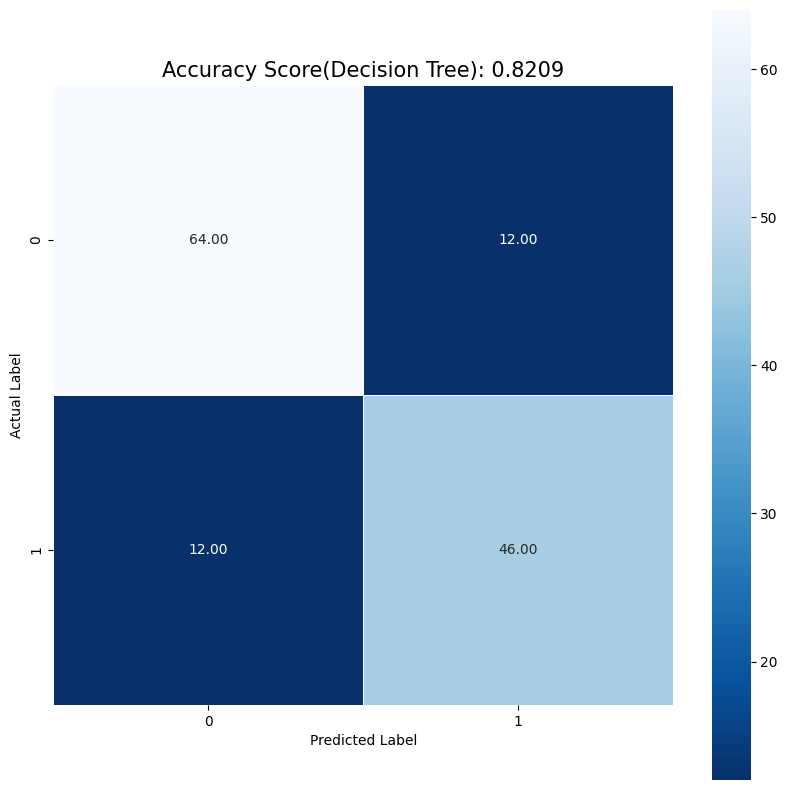

In [19]:
score2 = tree_grid.score(X_test, y_test)
cm = confusion_matrix(y_test, y_pred_decision_tree)

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".2f",
            linewidths=.5,
            square=True,
            cmap='Blues_r');
plt.ylabel('Actual Label');
plt.xlabel('Predicted Label');
all_sample_title = 'Accuracy Score(Decision Tree): {:.4f}'.format(score2)
plt.title(all_sample_title, size = 15);

In [20]:
#Output the metrics for decision tree
precision_2 = precision_score(y_test, y_pred_decision_tree, average='weighted', zero_division=0)
recall_2 = recall_score(y_test, y_pred_decision_tree, average='weighted', zero_division=0)
f1_2 = f1_score(y_test, y_pred_decision_tree, average='weighted', zero_division=0)

print(precision_2)
print(recall_2)
print(f1_2)

0.8208955223880597
0.8208955223880597
0.8208955223880597


##### Decision Tree performs far worse than Logistic Regression suggesting it lacks the ability in consistent predicition making. 

## Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

#Hyperparameter tuning
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5,scoring='accuracy')

start_time = tm.time()
rf_grid.fit(X_train, y_train);
end_time = tm.time()
elapsed_time = end_time - start_time

print("Random Forest fitting time(in Seconds): {:.4f}".format(elapsed_time))
print("Best Random Forest Params:", rf_grid.best_params_)

best_rf_model = rf_grid.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

Random Forest fitting time(in Seconds): 31.6163
Best Random Forest Params: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


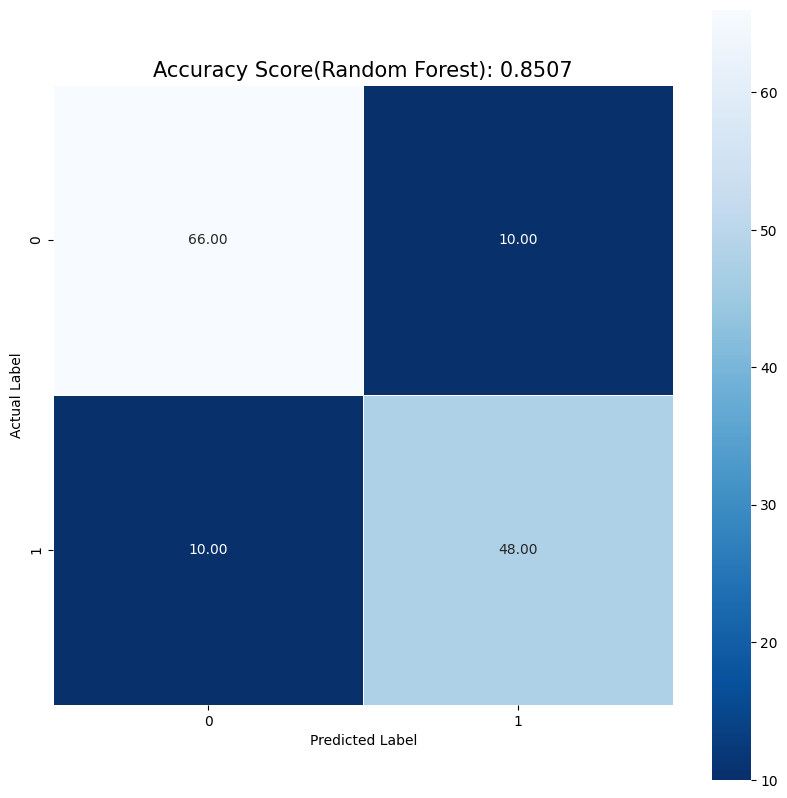

In [22]:
score3 = rf_grid.score(X_test, y_test)
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".2f",
            linewidths=.5,
            square=True,
            cmap='Blues_r');
plt.ylabel('Actual Label');
plt.xlabel('Predicted Label');
all_sample_title = 'Accuracy Score(Random Forest): {:.4f}'.format(score3)
plt.title(all_sample_title, size = 15);

In [23]:
#Output the metrics for random forest
precision_3 = precision_score(y_test, y_pred_rf, average='weighted', zero_division=0)
recall_3 = recall_score(y_test, y_pred_rf, average='weighted', zero_division=0)
f1_3 = f1_score(y_test, y_pred_rf, average='weighted', zero_division=0)

print(precision_3)
print(recall_3)
print(f1_3)

0.8507462686567164
0.8507462686567164
0.8507462686567164


##### The performance metrics of Random Forest were better than Decision Tree but worse than Logistic Regression. This model took significantly longer in fitting time compared to the other models.

## Support Vector Machine

In [24]:
from sklearn.svm import SVC

#Hyperparameter tuning
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svm_grid = GridSearchCV(SVC(), svm_params, cv=5, scoring='accuracy')

start_time = tm.time()
svm_grid.fit(X_train, y_train);
end_time = tm.time()
elapsed_time = end_time - start_time

print("Support Vector Machine fitting time(in Seconds): {:.4f}".format(elapsed_time))
print("Best SVM Params:", svm_grid.best_params_)

best_svm_model = svm_grid.best_estimator_
y_pred_svm = best_svm_model.predict(X_test)

Support Vector Machine fitting time(in Seconds): 0.4584
Best SVM Params: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}


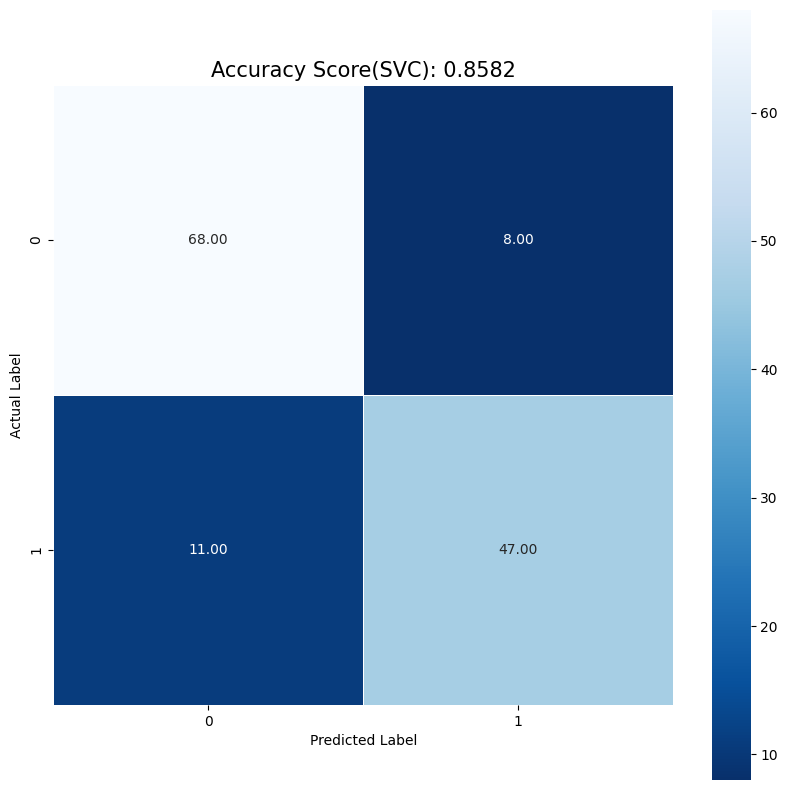

In [25]:
score4 = svm_grid.score(X_test, y_test)
cm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".2f",
            linewidths=.5,
            square=True,
            cmap='Blues_r');
plt.ylabel('Actual Label');
plt.xlabel('Predicted Label');
all_sample_title = 'Accuracy Score(SVC): {:.4f}'.format(score4)
plt.title(all_sample_title, size = 15);

In [26]:
#Output the metrics for SVM
precision_4 = precision_score(y_test, y_pred_svm, average='weighted', zero_division=0)
recall_4 = recall_score(y_test, y_pred_svm, average='weighted', zero_division=0)
f1_4 = f1_score(y_test, y_pred_svm, average='weighted', zero_division=0)

print(precision_4)
print(recall_4)
print(f1_4)

0.858069834944953
0.8582089552238806
0.8576989446146374


##### The performance metrics of SVM were closely aligned to those of Logistic Regression but slightly less precise.

## K-Nearest Neighbors

In [27]:
from sklearn.neighbors import KNeighborsClassifier

#Hyperparameter tuning
knn_params = {
    'n_neighbors': list(range(3, 21)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='accuracy')

start_time = tm.time()
knn_grid.fit(X_train, y_train);
end_time = tm.time()
elapsed_time = end_time - start_time

print("K-Nearest Neighbor fitting time(in Seconds): {:.4f}".format(elapsed_time))
print("Best KNN Params:", knn_grid.best_params_)

best_knn_model = knn_grid.best_estimator_
y_pred_knn = best_knn_model.predict(X_test)

K-Nearest Neighbor fitting time(in Seconds): 2.8723
Best KNN Params: {'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'distance'}


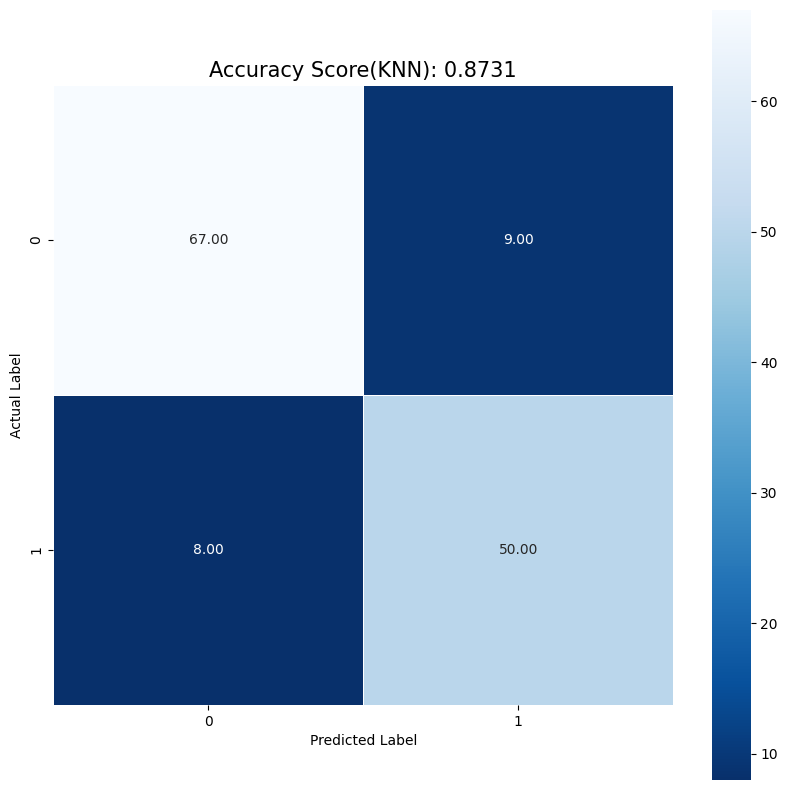

In [28]:
score5 = knn_grid.score(X_test, y_test)
cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".2f",
            linewidths=.5,
            square=True,
            cmap='Blues_r');
plt.ylabel('Actual Label');
plt.xlabel('Predicted Label');
all_sample_title = 'Accuracy Score(KNN): {:.4f}'.format(score5)
plt.title(all_sample_title, size = 15);

In [29]:
#Ouput metrics for KNN
precision_5 = precision_score(y_test, y_pred_knn, average='weighted', zero_division=0)
recall_5 = recall_score(y_test, y_pred_knn, average='weighted', zero_division=0)
f1_5 = f1_score(y_test, y_pred_knn, average='weighted', zero_division=0)

print(precision_5)
print(recall_5)
print(f1_5)

0.8734766843747365
0.8731343283582089
0.8732564043426947


##### The KNN clearly is the best performing with hyperparameter tuning as all of its metrics outperformed the other models.

# Visualization and Reporting

In [30]:
#Compile all metrics for each model in table format
model_metrics = {
    'Logistic Regression': {'accuracy': score1, 'precision': precision_1, 'recall': recall_1, 'f1-score': f1_1},
    'Decision Tree': {'accuracy': score2, 'precision': precision_2, 'recall': recall_2, 'f1-score': f1_2},
    'Random Forest': {'accuracy': score3, 'precision': precision_3, 'recall': recall_3, 'f1-score': f1_3},
    'SVM': {'accuracy': score4, 'precision': precision_4, 'recall': recall_4, 'f1-score': f1_4},
    'KNN': {'accuracy': score5, 'precision': precision_5, 'recall': recall_5, 'f1-score': f1_5}
}

In [31]:
#Format table and output
print(f"{'Model':<20}{'Accuracy':<10}{'Precision':<10}{'Recall':<10}{'F1-Score':<10}")

for model, metrics in model_metrics.items():
    print(f"{model:<20}{metrics['accuracy']:<10.2f}{metrics['precision']:<10.2f}{metrics['recall']:<10.2f}{metrics['f1-score']:<10.2f}")

Model               Accuracy  Precision Recall    F1-Score  
Logistic Regression 0.86      0.86      0.86      0.86      
Decision Tree       0.82      0.82      0.82      0.82      
Random Forest       0.85      0.85      0.85      0.85      
SVM                 0.86      0.86      0.86      0.86      
KNN                 0.87      0.87      0.87      0.87      


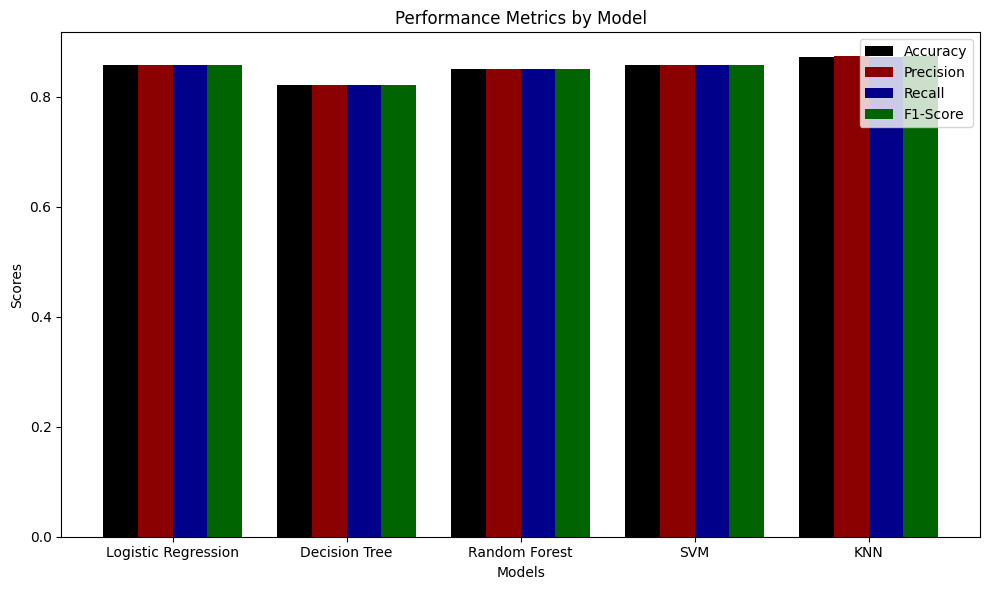

In [32]:
#Visualization for comparison of all metrics in the different models
accuracies = [metrics['accuracy'] for metrics in model_metrics.values()]
precisions = [metrics['precision'] for metrics in model_metrics.values()]
recalls = [metrics['recall'] for metrics in model_metrics.values()]
f1_scores = [metrics['f1-score'] for metrics in model_metrics.values()]
models = list(model_metrics.keys())

x = np.arange(len(models)) # Label locations
width = 0.2 # of bars

fig, ax = plt.subplots(figsize=(10, 6))

#Plotting bars for each metric
ax.bar(x - 1.5*width, accuracies, width, label='Accuracy', color='black')
ax.bar(x - 0.5*width, precisions, width, label='Precision', color='darkred')
ax.bar(x + 0.5*width, recalls, width, label='Recall', color='darkblue')
ax.bar(x + 1.5*width, f1_scores, width, label='F1-Score', color='darkgreen')

#Adding labels and titles
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics by Model')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

#Display the plot
plt.tight_layout()
plt.show()

##### On this visualization, we can see that the KNN model performs the best as all of its metrics outperform the other models while Decision Tree performs the worst in all metrics. It is also noticeable that the metrics for each model all are almost exactly the same. This tells us that we are dealing with a well balanced dataset and that there is a low false positive/negative rate in the models.  